---

**Load essential libraries**

---

In [110]:
import pandas as pd
import numpy as np
import os
import sys
import datetime

from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from PIL import Image

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_blobs

from scipy.sparse import random
from scipy import stats

C:\Users\adity\AppData\Local\Temp\ipykernel_17788\2999720531.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


---

**The following code cell mounts the Google Drive folder for accessing data etc.**

---

In [111]:
import os

# Specify your local data directory path
DATA_DIR = 'D:/ME/Colab Notebooks/Data/'

# Now you can use the DATA_DIR variable to access your data directory


**Data Matrix**

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [112]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

print(df_patient)
#df_patient.shape
#df_patient.head()
print('----------')
X = np.array(df_patient)
print(X)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0
----------
[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


**Vectors from the data matrix**

![Patient dataset](https://bl3302files.storage.live.com/y4mTMCQdiTnIFj1IALg09CRz7pPWl0g4HpigAPbwyMmF0QNliGAgK3aEsBESo0BNFCy-0-kR6pllskO1DPVt2-76bYsQaACRWhkOebqJ545BbtWcGr1CJG72BZJPrYbQDWNAC0h1EHhpewBlORT_xtahEu-bite73OVi-4CzGeQf6GDw11H6kn72VocdC2bLAsJ?width=256&height=167&cropmode=none)

1st feature vector (heart rate) for all patients:
$$x_1 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$

1st patient vector for all features:
$$x^{(1)} = \begin{bmatrix}76\\126\\38\end{bmatrix}$$

In [113]:
# Vector for 1st feature (HR)
x_1 = X[:, 0]
print(x_1)

# Vector for 2nd feature (BP)
x_2 = X[:, 1]
print(x_2)

# Vector for 1st patient
x1 = X[0, :]
print(x1)

# Vector for 2nd patient
x2 = X[1, :]
print(x2)

# Vector for 2nd patient but only 1st and 2nd features
#x2 = X[1, 0:2]
#print(x2)

[76. 74. 72. 78.]
[126. 120. 118. 136.]
[ 76. 126.  38.]
[ 74. 120.  38.]


---

**Components of a vector and matrix**

The components of a vector $x$ are denoted as $x_1,x_2,\ldots.$

The component in the $i$th row and $j$th column of a matrix is $X$ is represented as $X_{ij}.$

2nd patient, 1st feature (heart rate) value is $x^{(2)}_1.$

1st feature (heart rate), 2nd patient value is $\left(x_1\right)_2.$

---

In [114]:
# 2nd patient vector
x2 = X[1, :]

# 1st feature (heart rate) vector
x1 = X[:, 0]

# 2nd patient, 1st feature (heart rate) value
print(x2[0])

# Directly from the data matrix
print(X[1, 0])

74.0
74.0


---

**The following user-defined function will be used for component-plotting vectors**

---

In [115]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Index')
  ax.set_ylabel('Value')
  ax.set_title('Component plot of '+name)

---

**Read hourly temperature data**

---

In [135]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep = ",", header = 0, skiprows = [1])
df_temp['San Francisco']
df_temp.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


In [137]:
df_temp['datetime']

# Print the extracted column
df_temp.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


---

**Extract daily temperature vector for San Francisco**

---

In [119]:
df_temp['San Francisco']
df_temp.loc[:, 'San Francisco']
df_temp.iloc[:, 1]

0        284.630000
1        284.629041
2        284.626998
3        284.624955
4        284.622911
            ...    
45247           NaN
45248           NaN
45249           NaN
45250           NaN
45251           NaN
Name: Vancouver, Length: 45252, dtype: float64

In [131]:
# Convert date strings to datetime objects
date1_str = '2012-10-02'
date2_str = '2012-12-02'
date1 = pd.to_datetime(date1_str).date()
date2 = pd.to_datetime(date2_str).date()

# Temperature vector for San Francisco for 2012-10-02
t1 = df_temp.loc[df_temp.index.date == date1, 'San Francisco'].values
print(t1)

# Temperature vector for San Francisco for 2012-12-02
t2 = df_temp.loc[df_temp.index.date == date2, 'San Francisco'].values
print(t2)

# Plot temperature vectors for both days
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout(pad=4.0)
plotveccomp(t1, f'San Francisco Temperature {date1_str}', 'black', '*', ax1)
plotveccomp(t2, f'San Francisco Temperature {date2_str}', 'black', '*', ax2)
plt.show()


AttributeError: 'RangeIndex' object has no attribute 'date'

---

**Load an image as a vector**

<img src = 'https://drive.google.com/uc?id=1-kENYuqShwKAVI3oqryeMA_aXemoXmIW'>

---

In [ ]:
# Specify the image file path
FILENAME = 'D:/ME/Colab Notebooks/Data/lion.jpg'
# Read image
img = Image.open(FILENAME)
X = np.array(img)
print(X.shape)

(337, 600, 3)


(337, 600)
(202200,)


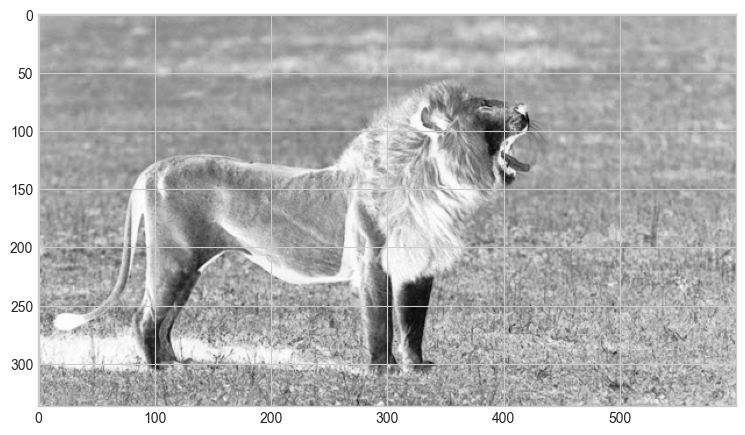

In [ ]:
## Read image
FILENAME = DATA_DIR + 'lion.jpg'
# os.chdir(DIR)
# Read image
img = Image.open(FILENAME)
# Convert image to gray scale
imggray = img.convert('L')
# Plot the image
plt.figure(figsize=(9, 6))
plt.imshow(imggray);
# Convert image into a 2D numpy array (a.k.a. a matrix)
X = np.array(imggray)
print(X.shape)
# Convert image matrix into a vector
x = X.flatten()
print(x.shape)

---

**Wikipedia articles as vectors**

---

In [ ]:
## Install the wikipedia package
#!pip install wikipedia

# Load the Wikipedia package
import wikipedia as wiki

---

**Extract Wikipedia content for 3 topics: Jungle Book, Harry Potter, Tarzan**

---

In [ ]:
# Extract Wikipedia content for 3 topics
a = wiki.page('jungle book', auto_suggest = False)
b = wiki.page('Harry Potter', auto_suggest = False)
c = wiki.page('Tarzan', auto_suggest = False)
# Print number of words in each article
print(len(a.content.split()))
print(len(b.content.split()))
print(len(c.content.split()))

2402
9400
5760


In [ ]:
print(a.content)

---

**Import text-to-vector vectorizers**

---

In [ ]:
## Import text-to-vector vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

---

**Vectorize the articles**

---

In [ ]:
# Create a vectorizer object
cv = CountVectorizer()
tfidfv = TfidfVectorizer()
X = np.asarray(tfidfv.fit_transform([a.content, b.content, c.content]).todense())
#feature_words = cv.get_feature_names_out()
print(X.shape)
#print(feature_words)
print(X[0])

(3, 3915)
[0.         0.         0.         ... 0.         0.00568192 0.00568192]


---

**Some commonly used vectors**

<p class="fragment roll-in">$$\underbrace{\begin{bmatrix}0\\0\\0\end{bmatrix}}_{\pmb{0}:\,\text{Zero vector}}\quad\underbrace{\begin{bmatrix}0\\0\\0\\0\\0\end{bmatrix}}_{\pmb{0}:\,\text{Zero vector}}\quad \underbrace{\begin{bmatrix}1\\0\\0\end{bmatrix}}_{e_1:\,\text{Unit vector}}\quad \underbrace{\begin{bmatrix}0\\1\\0\\0\end{bmatrix}}_{e_2:\,\text{Unit vector}}\quad \underbrace{\begin{bmatrix}1\\1\\1\\\vdots\\1\\1\end{bmatrix}}_{\pmb{1}:\,\text{ones vector}}$$</p>

---

---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![Vector addition](https://bl3302files.storage.live.com/y4mMlnDRWzIoNKWynOZFhzhFNDlReoFxf7XwSeFwNWW8f1lu5ssj_SvgMAEN9BWiQ2F-meER7rD2an2n2tfDoWffBHE8aD_WBsL0LAbHxnIpZtZu6hNJAvZ88m746S_ktA9-h-oo108AQjkXQHkYrgJ5AUCpvKB2dipeNG1VfIK_38Q8fsq6OKD43adplgy0H1k?width=200&height=80&cropmode=none)

![Vector subtraction](https://bl3302files.storage.live.com/y4mnQkNUONVVKJJ6dCEqV9lEuP360lE0yRumSIgl9LaQH_qBqjgI9wvUd64xJ-UNIjR7wJXZyaXZ_kf1_gAB9sXjMWaMxWhSnX6zcyvVtTrCDeO1MNWzj3A1YqI5YLALK-CGCSMurNV938QLH3C2u1-BE8_addFYSeO7DmCKz5TdWGf7qtC8M9rRN26RMqpk8iu?width=200&height=80&cropmode=none)

![Scalar-vector multiplication](https://bl3302files.storage.live.com/y4mYNwLMmuKRl3sNDSo0yyXYs0KFw1LBnQCU6nAgSawanlGNgLq7Bd93DQ0ojamRpGLx_PZvnsSG-6K-3TsdDctw5sm-QxnWUHSTJGalDR4JmUp27_Hf3ESAQukZ1Jk5G16ykO7H3AKmLSQxE4vVIAtMFbCnyxtsQEfpyb_SK5jIjVtjl7yoFcBDzsRDGzo5cZM?width=200&height=80&cropmode=none)

---

In [ ]:
# Assuming you have a matrix X with patient data, and you want to extract specific rows/columns
# For demonstration purposes, let's assume X has shape (num_patients, num_features)
X = np.array([[1.0, 2.0, 3.0],
              [0.5, 1.5, 2.5],
              [0.1, 0.2, 0.3]])  # Example patient data

# Example data for x1, x2, and x_2
x1 = np.array([1, 2, 3])
x2 = np.array([0.5, 1.5, 2.5])
x_2 = np.array([120, 150, 180])

# Vector addition and scalar multiplication
vector_sum = x1 + x2
vector_diff = x1 - x2
celsius_temps = (9/5) * x_2 + 32
minute_conversion = (1/60) * x_2

# Third patient vector (x3 extracted from matrix X)
x3 = X[2, :]

# Average patient vector
average_patient = (1/3) * (x1 + x2 + x3)

# Print results
print("Vector Addition Result:")
print(vector_sum)
print("Vector Subtraction Result:")
print(vector_diff)
print("Celsius to Fahrenheit Conversion:")
print(celsius_temps)
print("Minute to Hour Conversion:")
print(minute_conversion)
print("Average Patient Vector:")
print(average_patient)


Vector Addition Result:
[1.5 3.5 5.5]
Vector Subtraction Result:
[0.5 0.5 0.5]
Celsius to Fahrenheit Conversion:
[248. 302. 356.]
Minute to Hour Conversion:
[2.  2.5 3. ]
Average Patient Vector:
[0.53333333 1.23333333 1.93333333]



---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$a{\color{cyan}\cdot}b = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

---

In [ ]:
# Unit vectors
e_1 = np.array([1, 0, 0, 0])
e_3 = np.array([0, 0, 1, 0])

# Ones vector
o = np.array([1, 1, 1, 1])

# Vector for 1st feature (heart rate)
x_1 = np.array([284.63, 284.629041, 284.626998, 284.624955])

# Vector for 3rd feature (heart rate)
x_3 = np.array([0.5, 0.6, 0.7, 0.8])

# Get 1st component of vector (heart rate for 1st patient)
print(x_1[0])
print(np.dot(x_1, e_1))
print(np.dot(e_1, x_1))

# Get 3rd component of vector (heart rate for 3rd patient)
print(np.dot(x_3, e_3))

# Get sum of 1st feature values (heart rate) for all patients
print(np.sum(x_1))
print(np.dot(x_1, o))

# Average of 1st feature values (heart rate)
print((1/len(x_1)) * np.dot(x_1, o))
print(np.mean(x_1))

284.63
284.63
284.63
0.7
1138.510994
1138.510994
284.6277485
284.6277485


---

**Hadamard product**

---

In [ ]:
a = np.array([1/60, 1e-3, 1])
print(x1)
print(a)
print(x1*a)

[1 2 3]
[0.01666667 0.001      1.        ]
[1.66666667e-02 2.00000000e-03 3.00000000e+00]


---

**Norm of a vector**

A scalar representing how <font color="cyan">big a vector is in a geometric sense</font>:$$\lVert a\rVert =\sqrt{a_1^2+a_2^2+\cdots+a_n^2} = \sqrt{a\cdot a}$$
<p class="fragment">The <font color="cyan">symbol</font> ${\color{cyan}{\lVert\,\lVert}}$ represents the norm of a vector</p>

![Norm of a vector](https://bl3302files.storage.live.com/y4m8A4FYuLT9fy5RKHMEsnS-vKtnF2AHO9UTNerw_A84S_kM8U2FkhLb1-9O-_hN_aI0WWflvQS0kXTSG_K06nDWj9pzLnFw1S0hSrmKQw_dJdxW5r2k5OlqhqmeFoKKZDdivpoudbm6my5YZHU5RKMWBB39Fu5EEVQ7hfqjRuBhqoYkSmP0fbRLJY-XKsMCJRj?width=256&height=62&cropmode=none)

![Geometry of vector](https://bl3302files.storage.live.com/y4mTwTyJtDFs8AJR9CbNJCrCPk3413w4UWANehYJyao_43H2CyM90kdttDdDqiURZjtw57BgL34bmpsrrazm7r-Re31BHxH04LEeXTU85-TLXGjotJGGoqzCH-J_nXhARQdoHQ5J450Rw-fq30GMbCjeDWz9kf12a7cmjU73fr6gfROSrsAgI7GMHlusSxljDFe?width=360&height=100&cropmode=none)

---

In [ ]:
# Norm of the 1st feature (heart rate) vector
print(np.sqrt(np.dot(x_1, x_1)))
print(np.linalg.norm(x_1))

569.2554970132688
569.2554970132688


---

**Average and Root Mean Square (RMS) value of a vector**

<font color="green">Average</font> is a scalar representing the <font color="green">central value</font> around which the components of the vector are distributed: $${\color{green}{\text{avg}(a)}}=\frac{a_1+a_2+\cdots+a_n}{n}.$$
<p class="fragment">The <font color = "green">average value</font> of the vector $\begin{bmatrix}1\\-1\\-1\\1\end{bmatrix}$ is ${\color{green}0}$.</p>

<font color = "cyan">RMS</font> value is a scalar representing the <font color="cyan">typical absolute value</font> of an element of the vector: $$\text{rms}(a)=\sqrt{\frac{a_1^2+a_2^2+\cdots+a_n^2}{n}} = \frac{\lVert a\rVert}{\sqrt{n}}$$
<p class="fragment">The <font color = "cyan">rms value</font> of the vector $\begin{bmatrix}1\\-1\\-1\\1\end{bmatrix}$ is ${\color{cyan}1}$.</p>

---

In [ ]:
# RMS value of the 1st feature (heart rate) vector
print(np.linalg.norm(x_1)/np.sqrt(len(x_1)))

# Compare with the average of the 1st feature (heart rate) vector
print(np.mean(x_1))

284.6277485066344
284.6277485


---

**Deviation from the average**

The vector $a-\text{avg}(a)\mathbf{1}$ is called the *de-meaned* or *mean centered* version of $a.$

![Demeaned vector](https://bl3302files.storage.live.com/y4mRZeCpRTmxCVjlTBh63SSC-9ykIfmf-ZvIaXrp6prd1XpSPT0RhhaQ1j0vFp9lpKPaZtL8S1CSa64Bsw34x2_ncg1dAwBjR5lt6J8qOVqORlZIOw4gtOu0IIRHVbP3Zy4fZDeIzn8mgHFCc5y75W4PDkq0mhs-6VTSULUZQSefLhbTlv04pY_nAjg-rfyQ5jl?width=400&height=200&cropmode=none)

---

In [ ]:
# Calculate the mean centered heart rate vector
x_1m = x_1 - np.mean(x_1)
print(x_1m)

[ 0.0022515  0.0012925 -0.0007505 -0.0027935]


---

**Standard devitation of a vector**

A measure of how much the <font color="cyan">elements of a vector typically deviate from their average value</font>
<p class="fragment">$$\text{std}(x) = \sqrt{\frac{\left[x_1-\text{avg}(x)\right]^2+\cdots+\left[x_n-\text{avg}(x)\right]^2}{n}} = \frac{1}{\sqrt{n}}\sqrt{(x-\text{avg}(x)\mathbf{1})\cdot(x-\text{avg}(x)\mathbf{1})}$$</p>
<ul>
<li class="fragment roll-in">It can be shown that standard deviation of a vector $x$ is the RMS value of the <font color ="magenta">mean centered</font> vector ${\color{magenta}{x-\text{avg}(x)\pmb{1}}}$ represented as ${\color{magenta}{x_m}}$</li>
<li class="fragment roll-in">Standard deviation of a vector is small when its entries are nearly the same</li>
<li class="fragment roll-in">For any vector $x$, ${\color{red}{\text{rms}(x)^2}} = {\color{green}{\text{avg}(x)^2}}+{\color{yellow}{\text{std}(x)^2}}$</li>
</ul>

---

In [ ]:
# Standard deviation of the 1st feature (heart rate) vector
np.std(x_1)

0.0019433669879803158

In [ ]:
# Set option to print the entire dataframe
pd.set_option('display.max_rows', None, 'display.max_columns', None)

---

**Simulate heart rate and blood pressure for 100 patients**

---

In [ ]:
## Simulate a patient dataset
#np.random.seed(100)
nsamples = 100
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                   'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.tight_layout(pad = 4.0)
binwidth = 2.0
a = df['Heart Rate (BPM)']
ax.hist(a, bins = np.arange(np.min(a), np.max(a) + binwidth, binwidth))
ax.set_xlabel('Heart Rate', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticks(np.arange(np.min(a), np.max(a) + binwidth, binwidth));

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.tight_layout(pad = 4.0)
binwidth = 2.0
b = df['Blood Pressure (mm Hg)']
ax.hist(b, bins = np.arange(np.min(b), np.max(b) + binwidth, binwidth))
ax.set_xlabel('Blood Pressure (mm Hg)', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xticks(np.arange(np.min(b), np.max(b) + binwidth, binwidth));

In [ ]:
# How are the heart rate and blood pressure values related?
# Scatter plot between heart rate (BPM) and blood pressure (mm Hg)
a = df['Heart Rate (BPM)']
#print(type(a.values))
b = df['Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])

---

**Standardizing the tempreature values**

---

In [ ]:
# Standard deviation of San Francisco's temperature in Kelvin
#print(t1)
print(np.std(t1)) # sd in units Kelvin

# Convert the temperature from Kelvin to Celsius
t1_c = t1 - 273.15
#print(t1_c)
print(np.std(t1_c)) # sd in units Celsius

# Convert the temperature from Celsius to Fahrenheit
t1_f = (9/5)*t1_c+ 32
#print(t1_f)
print(np.std(t1_f))

# Standardize the temperature vector in Kelvin
t_zk =  (t1-np.mean(t1))/np.std(t1)   # (t1-avg(t1)1)/std(t1) pen & paper way of doing this
print(t_zk) # Also called the z-scores for temperature in Kelvin

# Standardize the temperature vector in Celsius
t_zc =  (t1_c-np.mean(t1_c))/np.std(t1_c)
print(t_zc) # Also called the z-scores for temperature in Celsius

# Standardize the temperature vector in Fahrenheit
t_zf =  (t1_f-np.mean(t1_f))/np.std(t1_f)
print(t_zf) # Also called the z-scores for temperature in Fahrenheit

# Anomalous temperatures
threshold = 1.5 # for detecting outliers
print(np.where(np.abs(t_zf) >= threshold))

---

**Standardizing the heart rate values**

---

In [ ]:
sc = StandardScaler()
#print(a)
#print((a-np.mean(a))/np.std(a)) # standardized heart rate values
#print(sc.fit(df)) # Standardizing all the columns in one shot
print(sc.fit_transform(df)) # We construct the standardization model using the train set df
# Test dataframe
nsamples = 2
df_test = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                        'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df_test)
sc.transform(df_test) # Applying the standardization model to the test set df_test

In [ ]:
rsc = RobustScaler()
#print(a)
#print((a-np.mean(a))/np.std(a)) # standardized heart rate values
#print(sc.fit(df)) # Standardizing all the columns in one shot
print(rsc.fit_transform(df)) # We construct the standardization model using the train set df
# Test dataframe
nsamples = 2
df_test = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples)),
                        'Blood Pressure (mm Hg)' : np.round(np.random.normal(126, 8, nsamples))})
print(df_test)
rsc.transform(df_test) # Applying the standardization model to the test set df_test

In [ ]:
## Standardize the HR

# Mechanical way
sdev = lambda x: np.linalg.norm(x-np.mean(x)) / np.sqrt(len(x)-1)

# Using scalers
sc = StandardScaler()
rsc = RobustScaler()

df_new = pd.DataFrame({'HR' : a,
                       'HRSD' : (a-np.mean(a)) / np.std(a),
                       'HRSD1' : (a-np.mean(a)) / sdev(a),
                       'HRSS' : sc.fit_transform(a.values.reshape(-1, 1)).flatten(),
                       'HRRS' : rsc.fit_transform(a.values.reshape(-1, 1)).flatten()})
df_new.head()

---

**Add meaned-centred heart rate and blood pressure values to the dataframe**

---

In [ ]:
## Add meaned-centred features to the dataframe
df['Mean-centred Heart Rate (BPM)'] = a - np.mean(a)
df['Mean-centred Blood Pressure (mm Hg)'] = b - np.mean(b)
print(df)

---

**How are the mean-centred heart rate and blood pressure values related?**

---

In [ ]:
## Scatter plot between meaned-centred heart rate (BPM) and meaned-centred blood pressure (mm Hg)
a_mc = df['Mean-centred Heart Rate (BPM)']
b_mc = df['Mean-centred Blood Pressure (mm Hg)']
fig, ax = plt.subplots(1)
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Mean-centred Heart Rate (BPM)')
ax.set_ylabel('Mean-centred Blood Pressure (mm Hg')
ax.set_title('Mean Centred Plot of Heart Rate vs. Blood Pressure')

In [ ]:
## Scatter plot both versions
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.scatter(a_mc, b_mc, marker = '*', color = 'red')
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg')
ax.set_title('Heart Rate vs. Blood Pressure')
plt.axvline(0)
plt.axhline(0)

---

**Add standardized heart rate and blood pressure values to the dataframe**

---

In [ ]:
# Add standardize features to the dataframe
df['Standardize Heart Rate'] = (a - np.mean(a)) / np.std(a)
df['Standardized Blood Pressure'] = (b - np.mean(b)) / np.std(b)
print(df)

In [ ]:
name = 'Heart Rate (BPM)'
' '.join(name.split()[0:2]) + ' Vector'

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 6))
fig.tight_layout(pad = 4.0)
plotveccomp(a, 'Heart Rate (BPM)', 'black', '*', ax1)
plotveccomp(a-np.mean(a), 'Mean-centred Heart Rate (BPM)', 'black', '*', ax2)
plotveccomp((a - np.mean(a))/np.std(a), 'Standardized Heart Rate (No Units)', 'black', '*', ax3)

---

**Cauchy-Schwarz inequality**

For any two $n$-vectors $a,b,$ it is always true that $$-1\leq\frac{a\cdot b}{\lVert a\rVert\lVert b\rVert}\leq 1.$$

This is used to define the cosine of the angle between the vectors $a$ and $b$ as follows:$$\cos(\angle(a,b)) = \frac{a\cdot b}{\lVert a\rVert\lVert b\rVert}.$$

---

In [ ]:
print(np.dot(a, b)) # Dot-product between the original vectors do not reveal much
print(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))) # Recall angle(a,b) acos(aT*b/(||a||*||b||))
print(np.dot(a_mc, b_mc)) # Covariance between a and b
print(np.dot(a_mc, b_mc) / (np.linalg.norm(a_mc) * np.linalg.norm(b_mc))) # Correlation coefficient

---

**The following user-defined function will be used for plotting vectors geometrically**

---

In [ ]:
def plotvector(x, name = None, axis = None):
  ax = axis or plt.gca()
  component_index = range(0,len(a))
  ax.plot(component_index, x, color = 'blue', marker = 'o')
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'red')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color = 'green')
  ax.set_xticks(np.arange(0, np.max(component_index), step = 2))
  ax.set_ylabel('Return')
  ax.set_xlabel('Year #')
  ax.set_title(name)

---

**Simulate returns of four types of investment over a 10 year period**

---

In [ ]:
# Generate four return vectors
nsamples = 10
a = np.round(np.random.normal(1, 0, nsamples))
#print(a.shape)
b = np.round(np.random.normal(2, 4, nsamples))
c = np.round(np.random.normal(2, 4, nsamples)) + np.random.uniform(-10, 10, nsamples)
d = np.round(np.random.normal(2, 4, nsamples)) - np.random.uniform(-3, 3, nsamples)
fig, axes = plt.subplots(2, 2, figsize = (6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.tight_layout(pad = 4.0)
plotvector(a, 'Investment-A', ax1)
plotvector(b, 'Investment-B', ax2)
plotvector(c, 'Investment-C', ax3)
plotvector(d, 'Investment-d', ax4)

---

**Calculate average return and risk for each investment type**

---

In [ ]:
avgreturn = np.mean([a ,b, c, d], axis = 1)
risk = np.std([a ,b, c, d], axis = 1)
print(avgreturn)
print(risk)

---

Visualize risk vs. return for all investment types

---

In [ ]:
# Plot risk vs. average return for the four investments
sdev = lambda x: np.linalg.norm(x-np.mean(x)) / np.sqrt(len(x)-1)
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
avgreturn = np.mean([a ,b, c, d], axis = 1)
risk = list(map(sdev, [a ,b, c, d]))
ax.scatter(avgreturn, risk, s = 5.0, color = 'blue', marker = 'o')
ax.set_xlabel('Avg. Return')
ax.set_ylabel('Risk')
stock = ['A', 'B', 'C', 'D']
for i, txt in enumerate(stock):
    ax.annotate(txt, (avgreturn[i], risk[i]))

---

**Identify outliers in the return of an investment type**

---

In [ ]:
cutoff = 1.4
outliers = np.abs((b - np.mean(b))/sdev(b)) >= cutoff
print(outliers)
print(b[outliers])
print(np.where(outliers))

---


Given **unit vectors** $a$ and $b$ separated by angle $\theta$.
1.   *Euclidean dissimilarity*: $$\begin{align*}d_{E}(a,b) &= \lVert a-b\rVert \\&=  \sqrt{(a-b)\cdot (a-b)} \\&= \sqrt{a\cdot a-2a\cdot b+b\cdot b}\\&=\sqrt{\underbrace{\lVert a\rVert^2}_{=1}-2\underbrace{\frac{a\cdot b}{\lVert a\rVert\lVert b\rVert}}_{\cos(\angle(a,b))\,=\,\cos(\theta)}\times\lVert a\rVert\lVert b\rVert+\underbrace{\lVert b\rVert^2}_{=1}}\\&=\sqrt{2(1-\cos(\theta))}.\end{align*}$$
2. *Angular dissimilarity*: $$\begin{align*}d_{cos}(a,b) &= 1-\cos(\angle(a,b))\\&=1-\cos(\theta).\end{align*}$$

---

---

**Simulate heart rate and blood pressure values for 100 patients in 3 categories**

---

In [ ]:
# Simulaate heart rate (HR) and blood pressure (BP)
# values for 100 patients in 3 categories
X, y = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = [[74, 120], [82, 145], [98, 170]],
                  cluster_std = [6, 4, 10],
                  random_state = 1)
# How are the HR and BP values related?
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, 0], X[:, 1], s = 50, c = y, cmap = plt.cm.Spectral)
for j in range(X.shape[0]):
  ax.text(X[j, 0], X[j, 1], str(j))
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('BP (mm Hg)')
ax.set_title('Heart Rate vs. Blood Pressure')

---

**Make a geometric plot of specific samples**

---

In [ ]:
# Plot the specific samples
sample_number = [32, 52, 53, 94]
fig, ax = plt.subplots(1, 1)
ax.scatter(X[sample_number, 0], X[sample_number, 1],
           s = 50,
           c = y[sample_number],
           cmap = plt.cm.Spectral)
for j in sample_number:
  ax.text(X[j, 0], X[j, 1], str(j))
ax.set_xlabel('HR (BPM)')
ax.set_ylabel('BP (mm Hg)')
ax.set_title('Heart rate vs. blood pressure for 4 samples')

---

**Calculate Euclidean and cosine dissimilarity between selected patients**

---

In [ ]:
# Lambda functions for calculating distances
d_E = lambda a, b: np.linalg.norm(a-b) # Euclidean distance
d_cos = lambda a, b: 1-(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))

# Euclidean dissimilarity
print(d_E(X[sample_number[0]], X[sample_number[1]]))
print(d_E(X[sample_number[0]], X[sample_number[2]]))

# Cosine dissimilarity
print(d_cos(X[sample_number[0]], X[sample_number[1]]))
print(d_cos(X[sample_number[0]], X[sample_number[2]]))

---

**Calculate Euclidean and cosine dissimilarity between the Wikipedia articles**

---

In [ ]:
# Euclidean dissimilarity
print(d_E(X[0], X[1])) # between Jungle Book and Harry Potter
print(d_E(X[0], X[2])) # between Jungle Book and Tarzan

# Cosine dissimilarity
print(d_cos(X[0], X[1])) # between Jungle Book and Harry Potter
print(d_cos(X[0], X[2])) # between Jungle Book and Tarzan